# Explanaible AI - Shap
Documentation: 
- https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [1]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('\\')[:-1]
root_path = '\\'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  D:\github-mi-repo\Offline-Evaluation-ML-Regression


## RUN

In [15]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

# shap
import shap

### 0. Global params

In [36]:
# define folder where the models were saved. There are the same models accepted by gurobi but the feature eng changed

# list of folder with models = ['basic', 'scaler', 'poly_2', 'poly_3']
folder_models = 'basic'

### 1. Load data

In [37]:
### DEFINE LIST FEARTURES - TARGET (order data to have the same order in the features always)
list_features = ['AveOccup', 'Latitude', 'Population', 'AveBedrms', 'HouseAge', 'Longitude', 'AveRooms', 'MedInc']
target = 'Price'

In [38]:
### LOAD DATA
X_train = pd.read_pickle('artifacts/data/X_train.pkl')
X_test = pd.read_pickle('artifacts/data/X_test.pkl')
y_train = pd.read_pickle('artifacts/data/y_train.pkl')
y_test = pd.read_pickle('artifacts/data/y_test.pkl')

In [39]:
print('shape data')
print('\n\n TRAIN')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('\n\n TEST')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

shape data


 TRAIN
X_train:  (14540, 8)
y_train:  (14540, 1)


 TEST
X_test:  (3636, 8)
y_test:  (3636, 1)


### 2. Load Models
Load all the models in a dictory

In [41]:
## define list of models - list to have always the same order.
#### In this example, the strings in the list are the same with the models were saved
list_models_names = [
    "lr",
    "ridge",
    "lasso",
    
    "tree_simple",
    "tree_default",
    
    "rf_simple",
    "rf_default",

    "gb_simple",
    "gb_default",

    "xgb_simple",
    "xgb_default",

    "mlp_simple",
    "mlp_default"
]

In [42]:
# define path to folder models
path_folder_models = f'artifacts/models/{folder_models}/'

In [43]:
### load models
dict_models = {}
for model_name in list_models_names:
    print(f'loading model: {model_name}')
    path_model = path_folder_models + f'{model_name}.pkl'
    with open(path_model, 'rb') as artifact:
        dict_models[model_name] = pickle.load(artifact)

loading model: lr
loading model: ridge
loading model: lasso
loading model: tree_simple
loading model: tree_default
loading model: rf_simple
loading model: rf_default
loading model: gb_simple
loading model: gb_default
loading model: xgb_simple
loading model: xgb_default
loading model: mlp_simple
loading model: mlp_default


In [44]:
# select model example
model = dict_models['lr']

### 3. Sample data

In [70]:
# sample - run fast
X_train_100 = shap.utils.sample(X_train, 100)
y_train_100 = shap.utils.sample(y_train, 100)

### 4. Partial Dependence Plot
**Main**

To understand a feature’s importance in a model, it is necessary to understand both how changing that feature impacts the model’s output, and also the distribution of that feature’s values.


**Explication plot**

- Show the distribution of feature values as a histogram on the x-axis
- The gray horizontal line in the plot above represents the expected value of the model
- The vertical gray line represents the average value of the feature
- Note that the blue partial dependence plot line (which is the average value of the model output when we fix the median income feature to a given value) always passes through the intersection of the two gray expected value lines. We can consider this intersection point as the “center” of the partial dependence plot with respect to the data distribution

**Documentation**

- https://shap-lrjball.readthedocs.io/en/latest/generated/shap.partial_dependence_plot.html

In [58]:
# select a feature
feature = "MedInc"

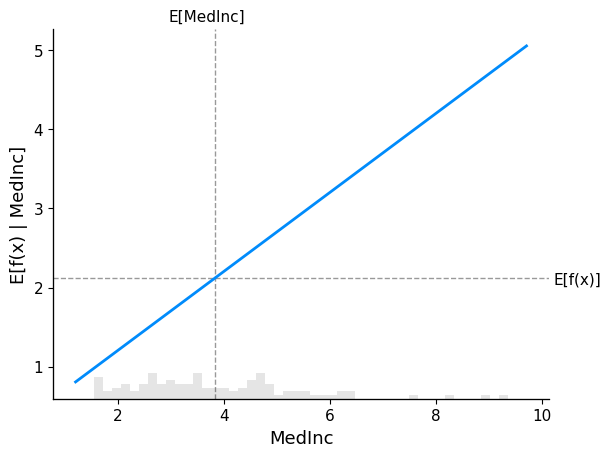

In [59]:
shap.partial_dependence_plot(
    feature,
    model.predict,
    X_train_100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

**Aditional**
When we are explaining a prediction
, the SHAP value for a specific feature
 is just the difference between the expected model output and the partial dependence plot at the feature’s value 

In [104]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X_train_100)
shap_values = explainer(X_train)
shap_values

.values =
array([[ 1.76331577e-01,  5.68070922e-01, -5.78339016e-01,
         4.46220066e-02,  8.99001280e-02,  1.56342668e-01,
        -3.07368454e-02,  4.89328308e-02],
       [ 3.79857320e-01, -8.97812293e-01,  1.10801468e+00,
         5.34855737e-03,  2.10211443e-01, -2.24826391e-01,
         7.37619809e-03,  2.92919245e-01],
       [-1.62597252e-01,  9.45412321e-02, -2.77204427e-01,
        -8.80653851e-02,  1.59905181e-01, -1.05241371e+00,
        -4.12726264e-02,  1.03152034e-01],
       [ 2.60598029e-01, -1.36722433e+00,  1.18028698e+00,
        -5.82651172e-03,  7.20478272e-02, -9.96293412e-01,
        -6.97134776e-02, -2.35717986e-01],
       [-7.10322209e-01,  6.87482757e-01, -5.34172609e-01,
        -4.21705043e-02,  2.28859165e-01, -7.48965026e-01,
         6.84606984e-02,  3.53780300e-02],
       [-1.40792685e-02,  2.88070758e-01,  3.00973984e-01,
        -4.68137651e-02, -7.51330895e-02, -1.49550366e-01,
        -2.48068704e-02, -4.59507747e-02],
       [ 7.36477771e-02,

ValueError: x and y can be no greater than 2D, but have shapes (2,) and (2, 1, 1)

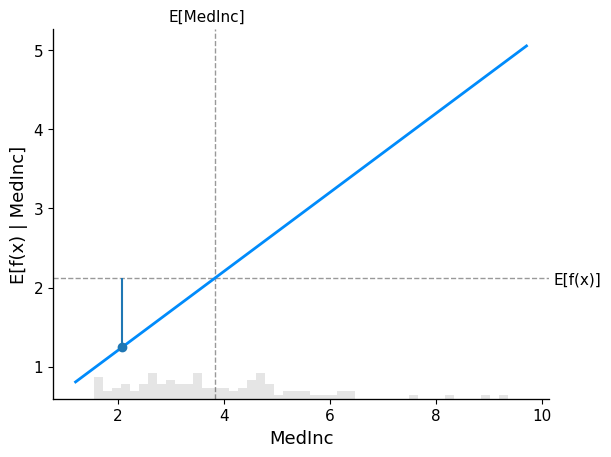

In [94]:


# make a standard partial dependence plot
sample_ind = 20

shap.partial_dependence_plot(
    feature,
    model.predict,
    X_train_100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
    #shap_values=shap_values[sample_ind : sample_ind + 1, :],  # plot a shap value
    shap_values = shap_values[sample_ind : sample_ind + 1, :]  # plot a shap value
)

In [95]:
shap.plots.scatter(shap_values[:, feature])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [99]:
shap_values#[:, feature]

.values =
array([[ 1.76331577e-01,  5.68070922e-01, -5.78339016e-01,
         4.46220066e-02,  8.99001280e-02,  1.56342668e-01,
        -3.07368454e-02,  4.89328308e-02],
       [ 3.79857320e-01, -8.97812293e-01,  1.10801468e+00,
         5.34855737e-03,  2.10211443e-01, -2.24826391e-01,
         7.37619809e-03,  2.92919245e-01],
       [-1.62597252e-01,  9.45412321e-02, -2.77204427e-01,
        -8.80653851e-02,  1.59905181e-01, -1.05241371e+00,
        -4.12726264e-02,  1.03152034e-01],
       [ 2.60598029e-01, -1.36722433e+00,  1.18028698e+00,
        -5.82651172e-03,  7.20478272e-02, -9.96293412e-01,
        -6.97134776e-02, -2.35717986e-01],
       [-7.10322209e-01,  6.87482757e-01, -5.34172609e-01,
        -4.21705043e-02,  2.28859165e-01, -7.48965026e-01,
         6.84606984e-02,  3.53780300e-02],
       [-1.40792685e-02,  2.88070758e-01,  3.00973984e-01,
        -4.68137651e-02, -7.51330895e-02, -1.49550366e-01,
        -2.48068704e-02, -4.59507747e-02],
       [ 7.36477771e-02,

In [100]:
shap_values.values

array([[ 1.76331577e-01,  5.68070922e-01, -5.78339016e-01,
         4.46220066e-02,  8.99001280e-02,  1.56342668e-01,
        -3.07368454e-02,  4.89328308e-02],
       [ 3.79857320e-01, -8.97812293e-01,  1.10801468e+00,
         5.34855737e-03,  2.10211443e-01, -2.24826391e-01,
         7.37619809e-03,  2.92919245e-01],
       [-1.62597252e-01,  9.45412321e-02, -2.77204427e-01,
        -8.80653851e-02,  1.59905181e-01, -1.05241371e+00,
        -4.12726264e-02,  1.03152034e-01],
       [ 2.60598029e-01, -1.36722433e+00,  1.18028698e+00,
        -5.82651172e-03,  7.20478272e-02, -9.96293412e-01,
        -6.97134776e-02, -2.35717986e-01],
       [-7.10322209e-01,  6.87482757e-01, -5.34172609e-01,
        -4.21705043e-02,  2.28859165e-01, -7.48965026e-01,
         6.84606984e-02,  3.53780300e-02],
       [-1.40792685e-02,  2.88070758e-01,  3.00973984e-01,
        -4.68137651e-02, -7.51330895e-02, -1.49550366e-01,
        -2.48068704e-02, -4.59507747e-02],
       [ 7.36477771e-02,  1.004541

In [102]:
shap_values.values[:, feature]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [106]:
shap.plots.scatter(shap_values[:, "MedInc"])

IndexError: index 0 is out of bounds for axis 0 with size 0